# Getting graph from corpus
---



# Loading in all Sentences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Extracted Sentences/"

In [ ]:
import json

In [ ]:
with open(MODEL_PATH + "all_years_array.json", "r") as f:
    all_docs = json.load(f)

In [ ]:
len(all_docs)

700

In [ ]:
all_docs_1D = [j for sub in all_docs for j in sub]

In [ ]:
len(all_docs_1D)

755496

In [ ]:
keyword = "pten"
found_sentences = [] 

for sentence in all_docs_1D:
  if keyword in sentence:
    found_sentences.append(sentence)

In [ ]:
len(found_sentences)

660

# Defining Molecules and Labels

In [ ]:
molecules = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]

In [ ]:
import pandas as pd
new_molecules_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/Named_Entity_Recognition/Abrv_Curated.csv", header=None)
new_molecules_df

,0,1,2,3,4,5
0,pi,phosphatidylinositol,NaN,NaN,NaN,NaN
1,pe,phosphatidylethanolamine,NaN,NaN,NaN,NaN
2,sm,sphingomyelin,NaN,NaN,NaN,NaN
3,hrp,horseradish peroxidase,NaN,NaN,NaN,NaN
4,ritc,rhodamine isothiocyanate,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1075,ma,methacrylate,NaN,NaN,NaN,NaN
1076,moetacl,hema-2[2-(methacryloyloxy)ethyl]trimethylammon...,NaN,NaN,NaN,NaN
1077,th-,tyrosine hydroxylase-,NaN,NaN,NaN,NaN
1078,phb,poly-beta-hydroxybutyrate,NaN,NaN,NaN,NaN


In [ ]:
molecules = molecules + list(set(new_molecules_df.loc[:,0]))

In [ ]:
molecules = list(set(molecules))

In [ ]:
new_molecules_df[new_molecules_df[0] == 'if']

,0,1,2,3,4,5
943,if,intermediate filament s,NaN,NaN,NaN,NaN


In [ ]:
molecules.remove("if")
molecules.remove("of")
molecules.remove("am")
molecules.remove("fat")
molecules.remove("th")
molecules.remove("th-")
molecules.remove("m.")
molecules.remove("set")
molecules.remove("protein")
molecules.remove("no")

In [ ]:
import numpy as np
# ensure no duplicates 
val = np.array(molecules) 
ii = np.where(val == "hrp")[0]
ii

array([46])

In [ ]:
molecule_labels = [1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1] 
len(molecules) == len(molecule_labels)
node_colors = ["green" if x==1 else "red" for x in molecule_labels]

In [ ]:
# import gensim 

# MODEL_PATH_ALL = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Gensim_Lemmatized_All_Docs/"
# model_all_years = gensim.models.KeyedVectors.load(MODEL_PATH_ALL + "{}.wordvectors".format("All Papers"), mmap='r')
# wordvec = model_all_years

# molecules_embedded = [] 
# for m in list(molecules): # create copy so removing doesn't mess with iterator 
#   try:
#     molecules_embedded.append(wordvec[m])
#   except KeyError:
#     molecules.remove(m)

In [ ]:
# Try with FastText Embeddings rather than word2vec embeddings above ^ 
import gensim 

fasttext_model_all_years = gensim.models.KeyedVectors.load("/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Gensim_Lemmatized_All_Docs/FastText.wordvectors", mmap='r')
fasttext_wordvec = fasttext_model_all_years

molecules_embedded = [] 
for m in list(molecules): # create copy so removing doesn't mess with iterator 
  try:
    molecules_embedded.append(fasttext_wordvec[m])
  except KeyError:
    molecules.remove(m)

In [ ]:
print(len(molecules))
print(len(molecules_embedded))

822
822


In [ ]:
# make sure to initialize this AFTER removing molecules with no embeddings
molecules_double_spaced = [" " + m + " " for m in molecules]
print(molecules_double_spaced)

[' pga ', ' ac ', ' gfra ', ' moetacl ', ' timp-1 ', ' cy7 ', ' rheb1 ', ' pk ', ' ido ', ' il-1b ', ' o-2a ', ' ipsi ', ' map kinase ', ' phb ', ' dclks ', ' cox-2 ', ' np-1 ', ' nlcam ', ' rtn4 ', ' pgipz ', ' endo-n ', ' tgf-ß ', ' fitc ', ' fatp ', ' lmo4 ', ' nf ', ' ihh ', ' hoxa-2 ', ' jak ', ' aqp-4 ', ' rockii ', ' yfp ', ' stat3 ', ' klf4 ', ' adam ', ' bmp ', ' ppars ', ' hspgs ', ' hsp ', ' pa ', ' ln ', ' igfs ', ' tmc ', ' sac ', ' apkc ', ' krx-20 ', ' hrp ', ' tnf-a ', ' lc3-ii ', ' rmg ', ' saha ', ' dnqx ', ' cre ', ' cams ', ' fgf2 ', ' pjun ', ' lama2 ', ' tgf ', ' am-7 ', ' saps ', ' ep ', ' gmf-\uf062 ', ' atl ', ' lif ', ' tianjin ', ' bmps ', ' omp ', ' pkg ', ' npy ', ' kspgs ', ' pe ', ' hb-egf ', ' hb-gam ', ' tr ', ' msg ', ' elam-1 ', ' nogo ', ' biop2 ', ' ngr ', ' psn ', ' emi1 ', ' fcs ', ' crem ', ' bme ', ' dha ', ' peg/pll ', ' sfk ', ' fsk ', ' il-1ra ', ' odn ', ' cscl ', ' csat ', ' plg ', ' c/ebp-β ', ' tubulin ', ' p-s6 ', ' rarb ', ' hek293 ', '

In [ ]:
def make_edges_from_dict(graph_dict):
  edges = [] 
  for molecule, assoc in graph_dict.items():
    for m in assoc:
        edges.append((molecule.strip(), m.strip()))

  
  return edges

In [ ]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

def create_networkx_graph(edges, molecules=molecules, molecules_embedded=molecules_embedded):
  figure(figsize=(18, 14), dpi=80)

  G = nx.Graph()
  G.add_nodes_from(molecules, v=molecules_embedded)
  G.add_edges_from(edges)
  nx.draw(G)

In [ ]:
from pyvis.network import Network

# Can't yet use embeddings for value attribute of pyvis graph
def create_pyvis_graph(edges, filename, molecules_arr, molecules_embedded, colors_arr):
  nt = Network('1000px', '1000px')
  # populates the nodes and edges data structures
  print(molecules)
  nt.add_nodes(molecules_arr)
  # nt.add_nodes(molecules_arr, color=node_colors)
  # nt.add_nodes(molecules_arr, value=molecules_embedded, color=node_colors)

  print(edges)
  nt.add_edges(edges)
  nt.show("{}.html".format(filename))
  print("Now open {}.html".format(filename))

In [ ]:
# TODO for nodes: 
## Use paragraphs, Use documents 
## Try with different than two spaces padding it 
## Add all molecules - DOING 
## Use Word2Vec Similarity - DONE 
## Use word embeddings - DONE 

## TODO for edges:
# strength of link using regeneration scores from combined y hats of BERT model for each sentence - DONE
# strength of link using regeneration scores from combined sum of causal verbs in each sentence - DONE
# strength of link from amount of vector similarity - DONE 

# Creating Graph from Same Sentence

In [ ]:
# Let's do by same sentence first 
all_docs_1D[100:110]

['april 19th, i divided the spinal marrow of a dog, between the last vertebra of the neck and first of the back.',
 'the muscles of the trunk of the body, but particularly those of the hind legs, appeared instantly relaxed; the legs continued supple, like those of an animal killed by electricity.',
 'the heart, on performing the operation, ceased for a stroke or two, then went on slow and full, and in about a q\\.tarter of an hour after, the pulse was 160 in a minute.',
 'respiration was performed by means of the diaphragm only, which acted very strongly for some hours.',
 'the operation was performed about a quarter of an hour before twelve at noon; about four in the afternoon the pulse was ninety only in a minute, and the heat of the body exceedingly abated, the diaphragm acting strongly, but irre\xad gularly.',
 'about seven in the evening, the pulse was not above twenty in a minute, the diaphragm acting strongly, but in re\xad peated jerks.',
 'between twelve at night and one in th

In [ ]:
graph_dict_sentence = {} 
for molecule in molecules_double_spaced:
  graph_dict_sentence[molecule.strip()] = set()

counter = 0
total_sentences = len(all_docs_1D)
for counter, sentence in enumerate(all_docs_1D):
  molecules_in_sentence = [] 
  for molecule in molecules_double_spaced:
    if molecule in sentence:
      molecules_in_sentence.append(molecule.strip())
  
  for found_molecule in molecules_in_sentence:
    to_add = molecules_in_sentence
    to_add.remove(found_molecule)
    # if to_add != []:
      # print("---")
      # print(f'Sentence {counter}/{total_sentences}')
      # print(sentence)
      # print(to_add) 
    molec_assoc = graph_dict_sentence[found_molecule]
    molec_assoc.update(to_add)
    graph_dict_sentence[found_molecule] = molec_assoc

  # counter += 1
  # if counter == 10000:
  #   break

print(graph_dict_sentence)

{'pga': set(), 'ac': {'sac', 'ca', 'cdna', 'o-2a', 'gags', 'nf', 'pa'}, 'gfra': {'cret'}, 'moetacl': set(), 'timp-1': {'laminin', 'mmp-9', 'mmps', 'gap'}, 'cy7': set(), 'rheb1': set(), 'pk': set(), 'ido': set(), 'il-1b': {'mhc', 'fgf-2', 'gm-csf', 'il-1', 'il-4', 'ii'}, 'o-2a': {'pdgf'}, 'ipsi': set(), 'map kinase': {'pr', 'at2', 'stat3', 'erk1/2', 'gsk3beta', 'nt-3', 'mscs', 'dlk', 'map', 'pdgf-bb', 'erk', 'map1b', 'gsk3β'}, 'phb': set(), 'dclks': set(), 'cox-2': set(), 'np-1': {'crmp-2', 'vegf', 'np-2', 'sema3a'}, 'nlcam': set(), 'rtn4': {'gap-43', 'cnp', 'gapdh', 'nogo-a'}, 'pgipz': {'ngf', 'socs3', 'il-6', 'shsocs3'}, 'endo-n': set(), 'tgf-ß': set(), 'fitc': {'ritc', 'gfap', 'bsa', 'igg'}, 'fatp': set(), 'lmo4': {'rhoa', 'rgma'}, 'nf': {'tubulin', 'gap-43', 'gfap', 'gfp', 'ritc', 'vegf', 'gap43'}, 'ihh': set(), 'hoxa-2': {'hoxa-10', 'hoxa-3', 'hoxa-4'}, 'jak': {'trk', 'stat3', 'stat', 'kinases', 'cret', 'mtor', 'mapk', 'socs3', 'pten'}, 'aqp-4': set(), 'rockii': set(), 'yfp': {'opn

In [ ]:
print(graph_dict_sentence)

{'pga': set(), 'ac': {'sac', 'ca', 'cdna', 'o-2a', 'gags', 'nf', 'pa'}, 'gfra': {'cret'}, 'moetacl': set(), 'timp-1': {'laminin', 'mmp-9', 'mmps', 'gap'}, 'cy7': set(), 'rheb1': set(), 'pk': set(), 'ido': set(), 'il-1b': {'mhc', 'fgf-2', 'gm-csf', 'il-1', 'il-4', 'ii'}, 'o-2a': {'pdgf'}, 'ipsi': set(), 'map kinase': {'pr', 'at2', 'stat3', 'erk1/2', 'gsk3beta', 'nt-3', 'mscs', 'dlk', 'map', 'pdgf-bb', 'erk', 'map1b', 'gsk3β'}, 'phb': set(), 'dclks': set(), 'cox-2': set(), 'np-1': {'crmp-2', 'vegf', 'np-2', 'sema3a'}, 'nlcam': set(), 'rtn4': {'gap-43', 'cnp', 'gapdh', 'nogo-a'}, 'pgipz': {'ngf', 'socs3', 'il-6', 'shsocs3'}, 'endo-n': set(), 'tgf-ß': set(), 'fitc': {'ritc', 'gfap', 'bsa', 'igg'}, 'fatp': set(), 'lmo4': {'rhoa', 'rgma'}, 'nf': {'tubulin', 'gap-43', 'gfap', 'gfp', 'ritc', 'vegf', 'gap43'}, 'ihh': set(), 'hoxa-2': {'hoxa-10', 'hoxa-3', 'hoxa-4'}, 'jak': {'trk', 'stat3', 'stat', 'kinases', 'cret', 'mtor', 'mapk', 'socs3', 'pten'}, 'aqp-4': set(), 'rockii': set(), 'yfp': {'opn

In [ ]:
edges_sentence = make_edges_from_dict(graph_dict_sentence)

In [ ]:
edges_sentence

[('ac', 'sac'),
 ('ac', 'ca'),
 ('ac', 'cdna'),
 ('ac', 'o-2a'),
 ('ac', 'gags'),
 ('ac', 'nf'),
 ('ac', 'pa'),
 ('gfra', 'cret'),
 ('timp-1', 'laminin'),
 ('timp-1', 'mmp-9'),
 ('timp-1', 'mmps'),
 ('timp-1', 'gap'),
 ('il-1b', 'mhc'),
 ('il-1b', 'fgf-2'),
 ('il-1b', 'gm-csf'),
 ('il-1b', 'il-1'),
 ('il-1b', 'il-4'),
 ('il-1b', 'ii'),
 ('o-2a', 'pdgf'),
 ('map kinase', 'pr'),
 ('map kinase', 'at2'),
 ('map kinase', 'stat3'),
 ('map kinase', 'erk1/2'),
 ('map kinase', 'gsk3beta'),
 ('map kinase', 'nt-3'),
 ('map kinase', 'mscs'),
 ('map kinase', 'dlk'),
 ('map kinase', 'map'),
 ('map kinase', 'pdgf-bb'),
 ('map kinase', 'erk'),
 ('map kinase', 'map1b'),
 ('map kinase', 'gsk3β'),
 ('np-1', 'crmp-2'),
 ('np-1', 'vegf'),
 ('np-1', 'np-2'),
 ('np-1', 'sema3a'),
 ('rtn4', 'gap-43'),
 ('rtn4', 'cnp'),
 ('rtn4', 'gapdh'),
 ('rtn4', 'nogo-a'),
 ('pgipz', 'ngf'),
 ('pgipz', 'socs3'),
 ('pgipz', 'il-6'),
 ('pgipz', 'shsocs3'),
 ('fitc', 'ritc'),
 ('fitc', 'gfap'),
 ('fitc', 'bsa'),
 ('fitc', 'ig

In [ ]:
"cs-pg" in molecules

True

In [ ]:
create_pyvis_graph(edges_sentence, "same_sentence", molecules, molecules_embedded, None)

['pga', 'ac', 'gfra', 'moetacl', 'timp-1', 'cy7', 'rheb1', 'pk', 'ido', 'il-1b', 'o-2a', 'ipsi', 'map kinase', 'phb', 'dclks', 'cox-2', 'np-1', 'nlcam', 'rtn4', 'pgipz', 'endo-n', 'tgf-ß', 'fitc', 'fatp', 'lmo4', 'nf', 'ihh', 'hoxa-2', 'jak', 'aqp-4', 'rockii', 'yfp', 'stat3', 'klf4', 'adam', 'bmp', 'ppars', 'hspgs', 'hsp', 'pa', 'ln', 'igfs', 'tmc', 'sac', 'apkc', 'krx-20', 'hrp', 'tnf-a', 'lc3-ii', 'rmg', 'saha', 'dnqx', 'cre', 'cams', 'fgf2', 'pjun', 'lama2', 'tgf', 'am-7', 'saps', 'ep', 'gmf-\uf062', 'atl', 'lif', 'tianjin', 'bmps', 'omp', 'pkg', 'npy', 'kspgs', 'pe', 'hb-egf', 'hb-gam', 'tr', 'msg', 'elam-1', 'nogo', 'biop2', 'ngr', 'psn', 'emi1', 'fcs', 'crem', 'bme', 'dha', 'peg/pll', 'sfk', 'fsk', 'il-1ra', 'odn', 'cscl', 'csat', 'plg', 'c/ebp-β', 'tubulin', 'p-s6', 'rarb', 'hek293', 'mnsod', 'ccl5', 'abl', 'hdms', 'syn', 'gpcrs', 'mmtv', 's1p', 'nc', 'ttn', 'rptp\uf056', 'hmgb1', 'hoxa-1', 'rh-b', 'naa', 'bcan', 'gst', 'p2', 'magr', 'hpma', 'mebr', 'crp-', 'mirna-21', 'camp', 

In [ ]:
stop_code_one

NameError: ignored

# Creating Graph from Word Embedding Similarity

In [ ]:
num_to_check = 100

graph_dict_similarity = {}
for molecule in molecules:
  graph_dict_similarity[molecule] = set()
  for word_tuple in wordvec.most_similar(molecule, topn=num_to_check):
    word = word_tuple[0]
    if (word in molecules) and (word != molecule):
      molec_assoc = graph_dict_similarity[molecule]
      molec_assoc.add(word) 
      graph_dict_similarity[molecule] = molec_assoc

print(graph_dict_similarity)   

edges_similarity = make_edges_from_dict(graph_dict_similarity)

create_pyvis_graph(edges_similarity, "similarity_" + str(num_to_check), molecules, molecules_embedded, None)

In [ ]:
graph_dict_similarity["socs3"]

In [ ]:
graph_dict_sentence["socs3"]

In [ ]:
def get_edges_of_molecule(edges, molecule):
  edge_molecules = set()
  for edge in edges:
    if edge[0] == molecule or edge[1] == molecule:
      temp = list(edge)
      temp.remove(molecule)
      edge_molecules.add(temp[0])
  print(edge_molecules)

In [ ]:
get_edges_of_molecule(edges_similarity, "nogo") 
get_edges_of_molecule(edges_sentence, "nogo") 

In [ ]:
get_edges_of_molecule(edges_similarity, "socs3") 


# GraphSAGE Unsupervised Sampling with Word2Vec Embeddings

From https://colab.research.google.com/drive/1-MjcMeH1YN9a9VQiy9FYra1dPDToOUZl#scrollTo=Y-j5Lv7qGOgz

In [ ]:
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1

In [ ]:
import stellargraph as sg

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# edge_list = edges_similarity
edge_list = edges_sentence

In [ ]:
source = [edge[0] for edge in edge_list]
target = [edge[1] for edge in edge_list]
pandas_edge_list = pd.DataFrame({"source": source, "target": target})
pandas_edge_list

In [ ]:
from stellargraph import IndexedArray

word_embed_feature_array = np.asarray([model_all_years[molecule] for molecule in molecules])
indexed_array = IndexedArray(word_embed_feature_array, index=molecules)  # so now we mapped the molecule to its word embedding

In [ ]:
G = sg.StellarGraph(
    indexed_array, pandas_edge_list, edge_type_default="line",
)
print(G.info())

In [ ]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UniformRandomWalk
from stellargraph.data import UnsupervisedSampler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score

from stellargraph import globalvar

In [ ]:
# Create Positive and Negative Examples for Unsupervised Classificaiton using Random Walk 
# Parameters for sampler 
nodes = list(G.nodes())
number_of_walks = 1
length = 2
randn = 101

# Create the sampler 
unsupervised_samples = UnsupervisedSampler(
    G, nodes=nodes, length=length, number_of_walks=number_of_walks, seed=randn
)

In [ ]:
# Creating node pair generator 
batch_size = 10
epochs = 10
num_samples = [10, 5]

In [ ]:
generator = GraphSAGELinkGenerator(G, batch_size, num_samples)
train_gen = generator.flow(unsupervised_samples)

In [ ]:
# Now for building the Graphsage neigborhood aggregator function 

In [ ]:
layer_sizes = [50, 50]
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=generator, bias=True, dropout=0.0, normalize="l2"
)

In [ ]:
# Build the model and expose input and output sockets of graphsage, for node pair inputs:
x_inp, x_out = graphsage.in_out_tensors()

In [ ]:
x_inp

In [ ]:
x_out

In [ ]:
prediction = link_classification(
    output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
)(x_out)

In [ ]:
# Now for loading GraphSAGE neigborhood aggregator into Keras and specifying loss 

In [ ]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy],
)

In [ ]:
# Training the model 
history = model.fit(
    train_gen,
    epochs=epochs,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True,
)

In [ ]:
# Now we can get the node embeddings it learned by using that aggregator function it learned 
# to generate embeddings for the nodes 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from stellargraph.mapper import GraphSAGENodeGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_inp_src = x_inp[0::2]
x_out_src = x_out[0]
embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)

In [ ]:
node_ids = molecules
node_gen = GraphSAGENodeGenerator(G, batch_size, num_samples).flow(node_ids)

In [ ]:
node_embeddings = embedding_model.predict(node_gen, workers=4, verbose=1)

In [ ]:
# Visualization 

In [ ]:
node_classifications = pd.Series(node_colors).astype("category").cat.codes

In [ ]:
# node_classifications = node_classifications.set_axis(molecules) # change index to molecules 

In [ ]:
# node_subject = node_classifications

X = node_embeddings
if X.shape[1] > 2:
    transform = TSNE  # PCA

    trans = transform(n_components=2)
    emb_transformed = pd.DataFrame(trans.fit_transform(X), index=node_ids)
    # emb_transformed["label"] = node_subject

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))  
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    # c=emb_transformed["label"].astype("category"),
    cmap="jet",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for Word2Vec Similarity Graph".format(transform.__name__)
)
plt.savefig(f"{randn}: TSNE_no_color")
plt.show()

In [ ]:
# map molecules -> molecule labels 
orig_molecules = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]
label_dict = {k:v for (k,v) in zip(orig_molecules, molecule_labels)}
label_dict

In [ ]:
color_map = {0: "red", 1: "green"}
from matplotlib.pyplot import figure


In [ ]:
alpha = 0.7
plt.rcParams["figure.figsize"] = (20,20)
# fig, ax = plt.subplots(figsize=(20, 3))  

# use this dictionary to add molecule labels of your choice to the plot
molecule_labels_to_plot = list(twoD_molecules.keys())
for row in emb_transformed.iterrows():
  molecule_name = row[0]
  if molecule_name in label_dict:
    plt.scatter(row[1][0], row[1][1], c=color_map[label_dict[molecule_name]], alpha=alpha) 
    plt.annotate(molecule_name, (row[1][0], row[1][1]))
  elif molecule_name in molecule_labels_to_plot:
    plt.scatter(row[1][0], row[1][1], c='blue', alpha=alpha) 
    plt.annotate(molecule_name, (row[1][0], row[1][1]))
  else:
    plt.scatter(row[1][0], row[1][1], c="lightsteelblue", alpha=alpha) 

# plt.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for Word2Vec Similarity Graph".format(transform.__name__)
)
plt.savefig(f"{randn}: TSNE_Labeled_Promoters_Inhibitors")
plt.show()

In [ ]:
full_embedding_dict = {molecule:emb for molecule,emb in zip(node_ids, X)}
# full_embedding_dict

In [ ]:
# import BERT to get scores for most similar molecules
import pickle 
bert_regen_scores_path = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/bert_regen_score_dict_supervised_3_classes_no_molecules.pkl"
bert_regen_scores_loaded = {} 
with open(bert_regen_scores_path, 'rb') as f:
  bert_regen_scores_loaded = pickle.load(f)

In [ ]:
# embeddings tranformed to 2D 
embedding_dict = {} 
for row in emb_transformed.index:
  embedding_dict[row] = tuple(emb_transformed.loc[row])

from scipy import spatial
source_point = embedding_dict['stat3']
cosine_similarities = {key:1 - spatial.distance.cosine(source_point, target) for key,target in embedding_dict.items()}
# sort dictionary with closest similarities at top 
cosine_similarities = {k: v for k, v in sorted(cosine_similarities.items(), reverse=True, key=lambda item: item[1])}
# get top 10 similarties from 2D Embedding
twoD_most_similar = list(cosine_similarities.items())[0:10]
# print(twoD_most_similar)

# BERT scores of closest 10 molecules in 2D embedding representation
twoD_molecules = {x[0]:bert_regen_scores_loaded[x[0]][0] for x in twoD_most_similar}
twoD_molecules

In [ ]:
from scipy import spatial
source_point = full_embedding_dict['pi3k']
cosine_similarities = {key:1 - spatial.distance.cosine(source_point, target) for key,target in full_embedding_dict.items()}
# sort dictionary with closest similarities at top 
cosine_similarities = {k: v for k, v in sorted(cosine_similarities.items(), reverse=True, key=lambda item: item[1])}
# get top 10 similarties from full embedding
full_most_similar = list(cosine_similarities.items())[0:10]
# print(full_most_similar)

# BERT scores of closest 10 molecules in full embedding representation
{x[0]:bert_regen_scores_loaded[x[0]][0] for x in full_most_similar}

In [ ]:
bert_regen_scores_loaded['abl']

# GraphSAGE Unsupervised Sampling with FastText Embeddings

From https://colab.research.google.com/drive/1-MjcMeH1YN9a9VQiy9FYra1dPDToOUZl#scrollTo=Y-j5Lv7qGOgz

In [ ]:
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1

In [ ]:
import stellargraph as sg

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# edge_list = edges_similarity
edge_list = edges_sentence

In [ ]:
source = [edge[0] for edge in edge_list]
target = [edge[1] for edge in edge_list]
pandas_edge_list = pd.DataFrame({"source": source, "target": target})
pandas_edge_list

,source,target
0,ac,sac
1,ac,ca
2,ac,cdna
3,ac,o-2a
4,ac,gags
...,...,...
2089,dapi,tgfb
2090,shh,tgfb
2091,shh,nt3
2092,dscam,jnk


In [ ]:
from stellargraph import IndexedArray

word_embed_feature_array = np.asarray([np.array(fasttext_model_all_years[molecule]) for molecule in molecules])
indexed_array = IndexedArray(word_embed_feature_array, index=molecules)  # so now we mapped the molecule to its word embedding

In [ ]:
G = sg.StellarGraph(
    indexed_array, pandas_edge_list, edge_type_default="line",
)
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 822, Edges: 2094

 Node types:
  default: [822]
    Features: float32 vector, length 100
    Edge types: default-line->default

 Edge types:
    default-line->default: [2094]
        Weights: all 1 (default)
        Features: none


In [ ]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UniformRandomWalk
from stellargraph.data import UnsupervisedSampler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score

from stellargraph import globalvar

In [ ]:
# Create Positive and Negative Examples for Unsupervised Classificaiton using Random Walk 
# Parameters for sampler 
nodes = list(G.nodes())
number_of_walks = 1
length = 2
randn = 99

# Create the sampler 
unsupervised_samples = UnsupervisedSampler(
    G, nodes=nodes, length=length, number_of_walks=number_of_walks, seed=randn
)

In [ ]:
# Creating node pair generator 
batch_size = 10
epochs = 10
num_samples = [10, 5]

In [ ]:
generator = GraphSAGELinkGenerator(G, batch_size, num_samples)
train_gen = generator.flow(unsupervised_samples)

In [ ]:
# Now for building the Graphsage neigborhood aggregator function 

In [ ]:
layer_sizes = [50, 50]
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=generator, bias=True, dropout=0.0, normalize="l2"
)

In [ ]:
# Build the model and expose input and output sockets of graphsage, for node pair inputs:
x_inp, x_out = graphsage.in_out_tensors()

/usr/local/lib/python3.8/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
x_inp

[<KerasTensor: shape=(None, 1, 100) dtype=float32 (created by layer 'input_7')>,
 <KerasTensor: shape=(None, 1, 100) dtype=float32 (created by layer 'input_10')>,
 <KerasTensor: shape=(None, 10, 100) dtype=float32 (created by layer 'input_8')>,
 <KerasTensor: shape=(None, 10, 100) dtype=float32 (created by layer 'input_11')>,
 <KerasTensor: shape=(None, 50, 100) dtype=float32 (created by layer 'input_9')>,
 <KerasTensor: shape=(None, 50, 100) dtype=float32 (created by layer 'input_12')>]

In [ ]:
x_out

[<KerasTensor: shape=(None, 50) dtype=float32 (created by layer 'lambda_1')>,
 <KerasTensor: shape=(None, 50) dtype=float32 (created by layer 'lambda_1')>]

In [ ]:
prediction = link_classification(
    output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
)(x_out)

link_classification: using 'ip' method to combine node embeddings into edge embeddings


In [ ]:
# Now for loading GraphSAGE neigborhood aggregator into Keras and specifying loss 

In [ ]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy],
)

In [ ]:
# Training the model 
history = model.fit(
    train_gen,
    epochs=epochs,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True,
)

Epoch 1/10
106/106 [==============================] - 4s 18ms/step - loss: 0.6493 - binary_accuracy: 0.6198
Epoch 2/10
106/106 [==============================] - 3s 24ms/step - loss: 0.6159 - binary_accuracy: 0.6920
Epoch 3/10
106/106 [==============================] - 2s 23ms/step - loss: 0.6049 - binary_accuracy: 0.6911
Epoch 4/10
106/106 [==============================] - 3s 23ms/step - loss: 0.5920 - binary_accuracy: 0.7300
Epoch 5/10
106/106 [==============================] - 2s 18ms/step - loss: 0.5899 - binary_accuracy: 0.7148
Epoch 6/10
106/106 [==============================] - 2s 18ms/step - loss: 0.5917 - binary_accuracy: 0.7129
Epoch 7/10
106/106 [==============================] - 2s 18ms/step - loss: 0.5961 - binary_accuracy: 0.7053
Epoch 8/10
106/106 [==============================] - 2s 18ms/step - loss: 0.5868 - binary_accuracy: 0.7139
Epoch 9/10
106/106 [==============================] - 2s 20ms/step - loss: 0.5902 - binary_accuracy: 0.7196
Epoch 10/10
106/106 [=======

In [ ]:
# Now we can get the node embeddings it learned by using that aggregator function it learned 
# to generate embeddings for the nodes 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from stellargraph.mapper import GraphSAGENodeGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_inp_src = x_inp[0::2]
x_out_src = x_out[0]
embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)

In [ ]:
node_ids = molecules
node_gen = GraphSAGENodeGenerator(G, batch_size, num_samples).flow(node_ids)

In [ ]:
node_embeddings = embedding_model.predict(node_gen, workers=4, verbose=1)

83/83 [==============================] - 1s 12ms/step


In [ ]:
# Visualization 

In [ ]:
node_classifications = pd.Series(node_colors).astype("category").cat.codes

In [ ]:
# node_classifications = node_classifications.set_axis(molecules) # change index to molecules 

In [ ]:
# node_subject = node_classifications

X = node_embeddings
if X.shape[1] > 2:
    transform = TSNE  # PCA

    trans = transform(n_components=2)
    emb_transformed = pd.DataFrame(trans.fit_transform(X), index=node_ids)
    # emb_transformed["label"] = node_subject

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


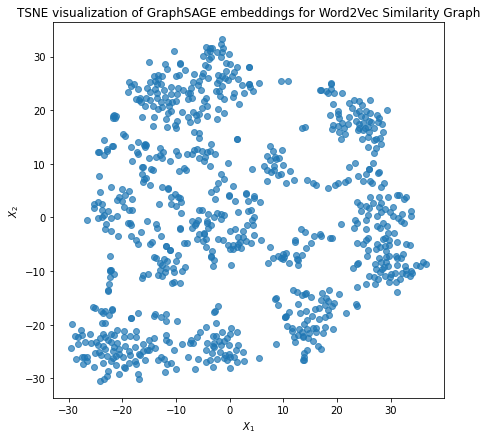

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))  
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    # c=emb_transformed["label"].astype("category"),
    cmap="jet",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for Word2Vec Similarity Graph".format(transform.__name__)
)
plt.savefig(f"{randn}: TSNE_no_color")
plt.show()

In [ ]:
# map molecules -> molecule labels 
orig_molecules = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]
label_dict = {k:v for (k,v) in zip(orig_molecules, molecule_labels)}
label_dict

{'netrin': 1,
 'ephrin': 0,
 'laminin': 1,
 'tenascin': 0,
 'cspg': 0,
 'zymosan': 1,
 'camp': 1,
 'pten': 0,
 'cntf': 1,
 'lif': 1,
 'oncomodulin': 1,
 'stat3': 1,
 'socs3': 0,
 'rhoa': 0,
 'rock': 0,
 'y27632': 1,
 'nogo': 0,
 'klf': 1,
 'ngr': 0,
 'lar': 0,
 'tlr2': 1,
 'bdnf': 0,
 'igf1': 1,
 'opn': 1,
 'mag': 0,
 'omgp': 0,
 'kspg': 0,
 'taxol': 1}

In [ ]:
color_map = {0: "red", 1: "green"}
from matplotlib.pyplot import figure


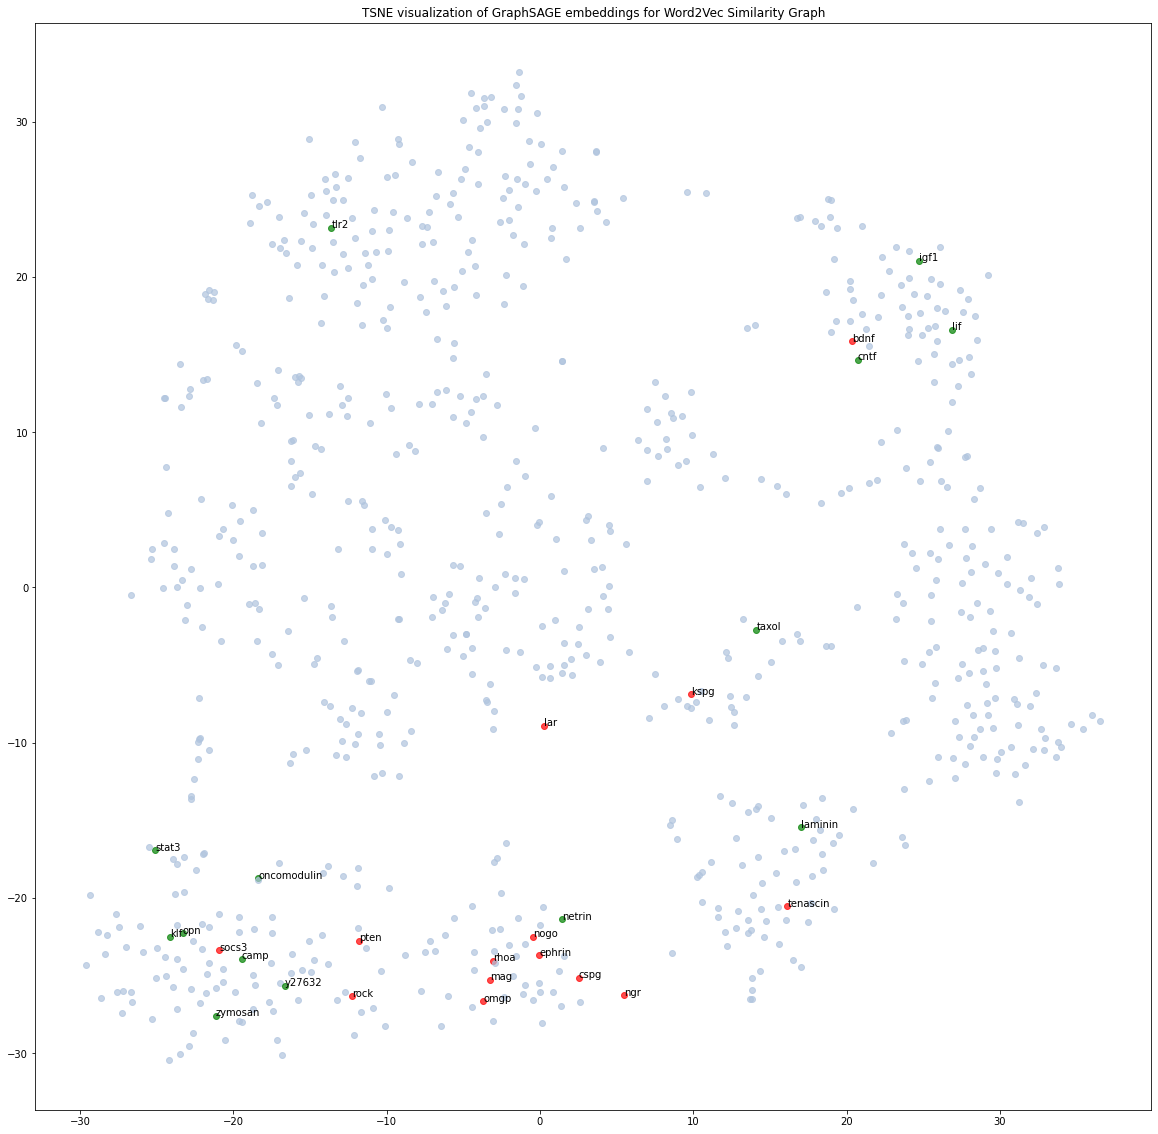

In [ ]:
alpha = 0.7
plt.rcParams["figure.figsize"] = (20,20)
# fig, ax = plt.subplots(figsize=(20, 3))  

# use this dictionary to add molecule labels of your choice to the plot
# molecule_labels_to_plot = list(twoD_molecules.keys())
molecule_labels_to_plot = []
for row in emb_transformed.iterrows():
  molecule_name = row[0]
  if molecule_name in label_dict:
    plt.scatter(row[1][0], row[1][1], c=color_map[label_dict[molecule_name]], alpha=alpha) 
    plt.annotate(molecule_name, (row[1][0], row[1][1]))
  elif molecule_name in molecule_labels_to_plot:
    plt.scatter(row[1][0], row[1][1], c='blue', alpha=alpha) 
    plt.annotate(molecule_name, (row[1][0], row[1][1]))
  else:
    plt.scatter(row[1][0], row[1][1], c="lightsteelblue", alpha=alpha) 

# plt.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for Word2Vec Similarity Graph".format(transform.__name__)
)
plt.savefig(f"{randn}: TSNE_Labeled_Promoters_Inhibitors")
plt.show()

In [ ]:
full_embedding_dict = {molecule:emb for molecule,emb in zip(node_ids, X)}
# full_embedding_dict

In [ ]:
# import BERT to get scores for most similar molecules
import pickle 
bert_regen_scores_path = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/bert_regen_score_dict_supervised_3_classes_no_molecules.pkl"
bert_regen_scores_loaded = {} 
with open(bert_regen_scores_path, 'rb') as f:
  bert_regen_scores_loaded = pickle.load(f)

In [ ]:
# embeddings tranformed to 2D 
embedding_dict = {} 
for row in emb_transformed.index:
  embedding_dict[row] = tuple(emb_transformed.loc[row])

from scipy import spatial
source_point = embedding_dict['stat3']
cosine_similarities = {key:1 - spatial.distance.cosine(source_point, target) for key,target in embedding_dict.items()}
# sort dictionary with closest similarities at top 
cosine_similarities = {k: v for k, v in sorted(cosine_similarities.items(), reverse=True, key=lambda item: item[1])}
# get top 10 similarties from 2D Embedding
twoD_most_similar = list(cosine_similarities.items())[0:10]
# print(twoD_most_similar)

# BERT scores of closest 10 molecules in 2D embedding representation
twoD_molecules = {x[0]:bert_regen_scores_loaded[x[0]][0] for x in twoD_most_similar}
twoD_molecules

{'stat3': array([0.38056179, 0.46276707, 0.15667115]),
 'trk': array([0.73537508, 0.14415179, 0.12047313]),
 'hsyn': array([0.87058413, 0.12506498, 0.0043509 ]),
 'nimp': array([0.04812365, 0.01580693, 0.93606941]),
 'stat': array([0.36284969, 0.34667734, 0.29047297]),
 'syt': array([0.38644151, 0.55559156, 0.05796694]),
 'rgm': array([0.44131544, 0.28553737, 0.27314718]),
 'pacap': array([0.47626391, 0.36534535, 0.15839073]),
 'myt-2': array([0.53395637, 0.014345  , 0.45169861]),
 'myt-1': array([0.00167908, 0.0011003 , 0.99722064])}

In [ ]:
from scipy import spatial
source_point = full_embedding_dict['stat3']
cosine_similarities = {key:1 - spatial.distance.cosine(source_point, target) for key,target in full_embedding_dict.items()}
# sort dictionary with closest similarities at top 
cosine_similarities = {k: v for k, v in sorted(cosine_similarities.items(), reverse=True, key=lambda item: item[1])}
# get top 10 similarties from full embedding
full_most_similar = list(cosine_similarities.items())[0:10]
# print(full_most_similar)

# BERT scores of closest 10 molecules in full embedding representation
{x[0]:bert_regen_scores_loaded[x[0]][0] for x in full_most_similar}

KeyError: ignored

In [ ]:
bert_regen_scores_loaded['ifn-γ'][0]

array([0.3005095 , 0.69764481, 0.00184573])

In [ ]:
stop_code

NameError: ignored

# GraphSAGE Unsupervised Sampling with BERT Word Embeddings


In [ ]:
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1

In [ ]:
import stellargraph as sg

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# edge_list = edges_similarity
edge_list = edges_sentence

In [ ]:
source = [edge[0] for edge in edge_list]
target = [edge[1] for edge in edge_list]
pandas_edge_list = pd.DataFrame({"source": source, "target": target})
pandas_edge_list

In [ ]:
import pickle 
bert_embedding_dict_path = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/bert_embedding_dict.pkl"
bert_embedding_dict_loaded = {} 
with open(bert_embedding_dict_path, 'rb') as f:
  bert_embedding_dict_loaded = pickle.load(f)

In [ ]:
from stellargraph import IndexedArray

bert_embed_feature_array = np.asarray([np.array(bert_embedding_dict_loaded[molecule][0]) for molecule in molecules])
indexed_array = IndexedArray(bert_embed_feature_array, index=molecules)  # so now we mapped the molecule to its word embedding

In [ ]:
G = sg.StellarGraph(
    indexed_array, pandas_edge_list, edge_type_default="line",
)
print(G.info())

In [ ]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UniformRandomWalk
from stellargraph.data import UnsupervisedSampler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score

from stellargraph import globalvar

In [ ]:
# Create Positive and Negative Examples for Unsupervised Classificaiton using Random Walk 
# Parameters for sampler 
nodes = list(G.nodes())
number_of_walks = 1
length = 2
randn = 101

# Create the sampler 
unsupervised_samples = UnsupervisedSampler(
    G, nodes=nodes, length=length, number_of_walks=number_of_walks, seed=randn
)

In [ ]:
# Creating node pair generator 
batch_size = 10
epochs = 10
num_samples = [10, 5]

In [ ]:
generator = GraphSAGELinkGenerator(G, batch_size, num_samples)
train_gen = generator.flow(unsupervised_samples)

In [ ]:
# Now for building the Graphsage neigborhood aggregator function 

In [ ]:
layer_sizes = [50, 50]
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=generator, bias=True, dropout=0.0, normalize="l2"
)

In [ ]:
# Build the model and expose input and output sockets of graphsage, for node pair inputs:
x_inp, x_out = graphsage.in_out_tensors()

In [ ]:
x_inp

In [ ]:
x_out

In [ ]:
prediction = link_classification(
    output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
)(x_out)

In [ ]:
# Now for loading GraphSAGE neigborhood aggregator into Keras and specifying loss 

In [ ]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy],
)

In [ ]:
# Training the model 
history = model.fit(
    train_gen,
    epochs=epochs,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True,
)

In [ ]:
# Now we can get the node embeddings it learned by using that aggregator function it learned 
# to generate embeddings for the nodes 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from stellargraph.mapper import GraphSAGENodeGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_inp_src = x_inp[0::2]
x_out_src = x_out[0]
embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)

In [ ]:
node_ids = molecules
node_gen = GraphSAGENodeGenerator(G, batch_size, num_samples).flow(node_ids)

In [ ]:
node_embeddings = embedding_model.predict(node_gen, workers=4, verbose=1)

In [ ]:
# Visualization 

In [ ]:
node_classifications = pd.Series(node_colors).astype("category").cat.codes

In [ ]:
# node_classifications = node_classifications.set_axis(molecules) # change index to molecules 

In [ ]:
# node_subject = node_classifications

X = node_embeddings
if X.shape[1] > 2:
    transform = TSNE  # PCA

    trans = transform(n_components=2)
    emb_transformed = pd.DataFrame(trans.fit_transform(X), index=node_ids)
    # emb_transformed["label"] = node_subject

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))  
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    # c=emb_transformed["label"].astype("category"),
    cmap="jet",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for Word2Vec Similarity Graph".format(transform.__name__)
)
plt.savefig(f"{randn}: TSNE_no_color")
plt.show()

In [ ]:
# map molecules -> molecule labels 
orig_molecules = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]
label_dict = {k:v for (k,v) in zip(orig_molecules, molecule_labels)}
label_dict

In [ ]:
color_map = {0: "red", 1: "green"}
from matplotlib.pyplot import figure


In [ ]:
alpha = 0.7
plt.rcParams["figure.figsize"] = (20,20)
# fig, ax = plt.subplots(figsize=(20, 3))  

# use this dictionary to add molecule labels of your choice to the plot
# molecule_labels_to_plot = list(twoD_molecules.keys())
molecule_labels_to_plot = {} 
for row in emb_transformed.iterrows():
  molecule_name = row[0]
  if molecule_name in label_dict:
    plt.scatter(row[1][0], row[1][1], c=color_map[label_dict[molecule_name]], alpha=alpha) 
    plt.annotate(molecule_name, (row[1][0], row[1][1]))
  elif molecule_name in molecule_labels_to_plot:
    plt.scatter(row[1][0], row[1][1], c='blue', alpha=alpha) 
    plt.annotate(molecule_name, (row[1][0], row[1][1]))
  else:
    plt.scatter(row[1][0], row[1][1], c="lightsteelblue", alpha=alpha) 

# plt.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for BERT Similarity Graph".format(transform.__name__)
)
plt.savefig(f"{randn}: TSNE_Labeled_Promoters_Inhibitors")
plt.show()

In [ ]:
stop_code_two

# Using Pre-Trained Bert to Classify Molecules (Doesn't help) 


In [ ]:
import pickle 
bert_regen_scores_path = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/bert_regen_score_dict_supervised_3_classes_no_molecules.pkl"
bert_regen_scores_loaded = {} 
with open(bert_regen_scores_path, 'rb') as f:
  bert_regen_scores_loaded = pickle.load(f)

In [ ]:
len(bert_regen_scores_loaded)

In [ ]:
df = pd.DataFrame(bert_regen_scores_loaded).T
df.columns = ['Avg Bert Regen Score', 'Total Sentences Found']
bert_regen_dict = df['Avg Bert Regen Score'].to_dict()
bert_regen_dict

In [ ]:
bert_regen_scores_curated = {k.strip():v for k,v in bert_regen_dict.items()}
bert_regen_scores_curated

In [ ]:
bert_regen_scores_curated['no'] = np.array([0,0,0])

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))  
for row in emb_transformed.iterrows():
  molecule_name = row[0]
  three_logits = bert_regen_scores_curated[molecule_name]
  label = np.argmax(three_logits) 
  if label == 0:
    ax.scatter(row[1][0], row[1][1], c="red", alpha=alpha) 
  elif label == 1:
    ax.scatter(row[1][0], row[1][1], c="green", alpha=alpha) 
  elif label == 2:
    ax.scatter(row[1][0], row[1][1], c="black", alpha=alpha) 
  else:
    raise Exception

ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for Word2Vec Similarity Graph".format(transform.__name__)
)
plt.savefig(f"{randn}: TSNE_sharp_cutoffs")
plt.show()

In [ ]:
s = pd.Series(bert_regen_scores_curated)
s.name = "Supervised Score"

In [ ]:
emb_transformed_score = emb_transformed.join(s)

In [ ]:
emb_transformed_score

In [ ]:
# TODO: How to convert 3 logits to gradient 

alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))  
ax.scatter(
    emb_transformed_score[0],
    emb_transformed_score[1],
    c=emb_transformed_score['Supervised Score'],
    cmap="RdYlGn",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for Word2Vec Similarity Graph".format(transform.__name__)
)
# plt.savefig(f"{randn}: TSNE_gradient")
plt.show()

In [ ]:
len(emb_transformed)

In [ ]:
emb_transformed_two = emb_transformed.copy() 

In [ ]:
pd.Series(bert_regen_scores_curated)

In [ ]:
emb_transformed_two = emb_transformed_two.join(s)

In [ ]:
emb_transformed_two

In [ ]:
# unlabeled = [] 
# for k,v in bert_regen_scores_curated.items():
#   if v == -1:
#     unlabeled.append(k)

# unlabeled

In [ ]:
# emb_transformed_two = emb_transformed_two.drop(unlabeled)

In [ ]:
# alpha = 0.7

# fig, ax = plt.subplots(figsize=(7, 7))  
# ax.scatter(
#     emb_transformed_two[0],
#     emb_transformed_two[1],
#     c=emb_transformed_two['Supervised Score'],
#     cmap="RdYlGn",
#     alpha=alpha,
# )
# ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
# plt.title(
#     "{} visualization of GraphSAGE embeddings without Unlabeled for Word2Vec Similarity Graph".format(transform.__name__)
# )
# plt.savefig(f"{randn}: TSNE_gradient_without_unlabeled")
# plt.show()

# Plotting Word Embeddings

In [ ]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    # for word, (x,y) in zip(words, twodim):
        # plt.text(x+0.05, y+0.05, word)

In [ ]:
color_encoding = [bert_regen_scores_curated[m] for m in molecules]
color_encoding

In [ ]:
# node_subject = node_classifications

X = np.asarray(molecules_embedded)
if X.shape[1] > 2:
    transform = TSNE  
    trans = transform(n_components=2)
    word_emb_transformed = pd.DataFrame(trans.fit_transform(X), index=molecules)

word_emb_transformed

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))  
for row in word_emb_transformed.iterrows():
  molecule_name = row[0]
  three_logits = bert_regen_scores_curated[molecule_name]
  label = np.argmax(three_logits) 
  if label == 0:
    ax.scatter(row[1][0], row[1][1], c="red", alpha=alpha) 
  elif label == 1:
    ax.scatter(row[1][0], row[1][1], c="green", alpha=alpha) 
  elif label == 2:
    ax.scatter(row[1][0], row[1][1], c="black", alpha=alpha) 
  else:
    raise Exception

ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for Word2Vec Similarity Graph".format(transform.__name__)
)
plt.savefig(f"{randn}: Word_Embed_Sharp_Cutoffs")
plt.show()

In [ ]:
word_emb_transformed = word_emb_transformed.join(s)
word_emb_transformed

In [ ]:
# TODO: How to convert 3 logits to a gradient 

alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))  
ax.scatter(
    word_emb_transformed[0],
    word_emb_transformed[1],
    c=word_emb_transformed['Supervised Score'],
    cmap="RdYlGn",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of Word Embeddings of Molecules".format(transform.__name__)
)
plt.savefig(f"{randn}: TSNE_Word_Embeddings")
plt.show()

# Classifying Promoters and Inhibitors by Lexicons

In [ ]:
lexiconDF = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/Lexicon.csv")
promoter_lexicon = list(lexiconDF['Promoter'].dropna())
inhibitor_lexicon = list(lexiconDF['Inhibitor'].dropna())

In [ ]:
inhibitor_lexicon

In [ ]:
from collections import defaultdict
molecule_lexicon_score = defaultdict(int)

total_sentences = len(all_docs_1D)
for counter, sentence in enumerate(all_docs_1D):
  found = False
  for m in molecules:
    if m in sentence:
      for p in promoter_lexicon:
        if p in sentence:
          molecule_lexicon_score[m] += 1
          print(f"{m} + 1 --> {p}")
          found = True 
      for i in inhibitor_lexicon:
        if i in sentence:
          molecule_lexicon_score[m] -= 1
          print(f"{m} - 1 --> {i}")
          found = True 
      
      if found:
          print(f"\t{counter}/{total_sentences}")
          found = False

molecule_lexicon_score

In [ ]:
label_map = {0: 'inhibitor', 1: 'promoter'}

In [ ]:
for m in orig_molecules:
  print(f"{m}: {molecule_lexicon_score[m]} ({label_map[label_dict[m]]})")

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))  
for m in orig_molecules:
  molecule_label = label_dict[m]
  if molecule_label == 1:
    ax.scatter(m, molecule_lexicon_score[m], c='green', alpha=alpha) 
  else:
    ax.scatter(m, molecule_lexicon_score[m], c='red', alpha=alpha) 

# ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "Visualization of Lexicon Scores for Molecules"
)
plt.xticks(rotation=90)
plt.show()


# K Nearest Neighbors Word Embeddings

In [ ]:
len(molecules_embedded)

In [ ]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(molecules_embedded, assign_clusters=True)
print (assigned_clusters)

In [ ]:
for m in molecules:
  print(f"{m}: {label_dict[m]} {assigned_clusters[molecules.index(m)]}")

In [ ]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(molecules_embedded)
 
assigned_clusters = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (assigned_clusters)

In [ ]:
for m in orig_molecules:
  print(f"{m}: {label_dict[m]} {assigned_clusters[molecules.index(m)]}")

# Previous Work

In [ ]:


keyword_dict = {} 
keywords = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]
#keywords = ["nucleus"]
for keyword in keywords:
  found_sentences = [] 

  for sentence in all_docs_1D:
    if keyword in sentence:
      found_sentences.append(sentence)

  counter = 0
  for sentence in found_sentences:
    if any(word in sentence for word in causal_verbs):
      # print("-> " + sentence)
      counter += 1

  to_append = [str(int(counter/len(found_sentences) * 100)) + "%", int(counter), int(len(found_sentences))]
  keyword_dict[keyword] = to_append
  print("{} {}/{}: {}".format(keyword, counter, len(found_sentences), counter / len(found_sentences)))

In [ ]:
import pandas as pd 
df = pd.DataFrame(keyword_dict)
df = df.T # flip columns with rows 
df.columns = ["% sentences with causal verb", "sentences with molecule and causal verb", "total sentences with molecule"]

In [ ]:
df